In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style
from matplotlib import cm
from matplotlib.ticker import LinearLocator

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format='retina'

In [12]:
x = np.arange(0.000000001, 10, 0.1)
y = np.zeros(len(x))

Text(0.5, 1.0, 'X')

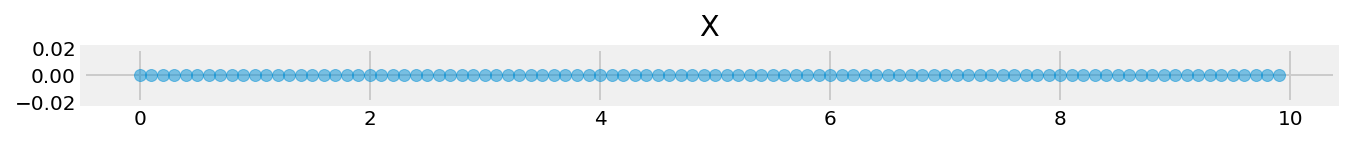

In [4]:
plt.figure(figsize=(10, 0.5))
plt.ylim(-0.02, 0.02)
plt.scatter(x, y, alpha=0.5)
plt.title('X')

Text(0.5, 1.0, 'Y')

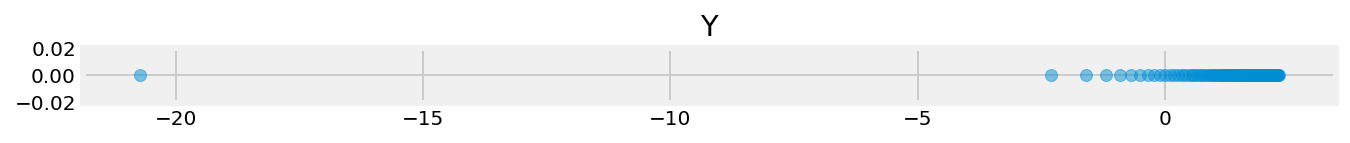

In [5]:
plt.figure(figsize=(10, 0.5))
plt.ylim(-0.02, 0.02)
plt.scatter(np.log(x), y, alpha=0.5)
plt.title('Y')

In [63]:
def experiment(interval_size=0.1):
    x = np.arange(1.000000001, 10, interval_size)
    y = np.zeros(len(x))
    
    plt.figure(figsize=(10, 0.5))
    plt.ylim(-0.02, 0.02)
    plt.scatter(x, y, alpha=0.5)
    plt.title(f'X (interval size: {interval_size})')
    plt.tick_params(axis='y', left=False, labelleft=False)
    
    plt.figure(figsize=(10, 0.5))
    plt.ylim(-0.02, 0.02)
    plt.scatter(np.log(x), y, alpha=0.5)
    plt.title('Y')
    plt.tick_params(axis='y', left=False, labelleft=False)
    
    plt.show()
    
    print('_________________________________________________________________________________')
    print('\n')

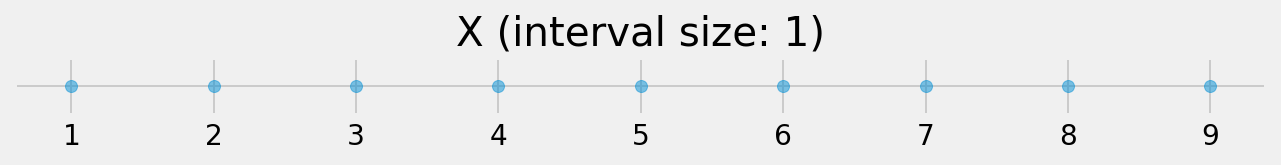

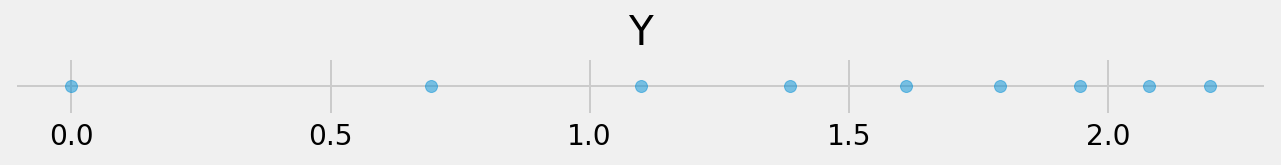

_________________________________________________________________________________




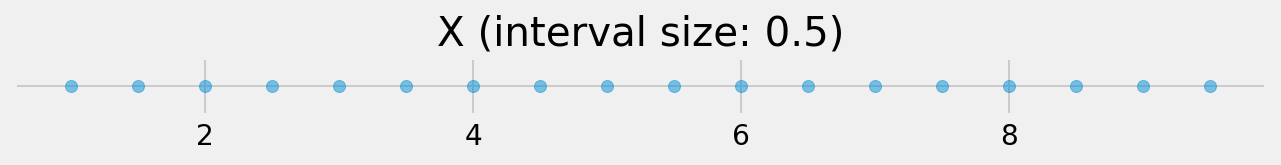

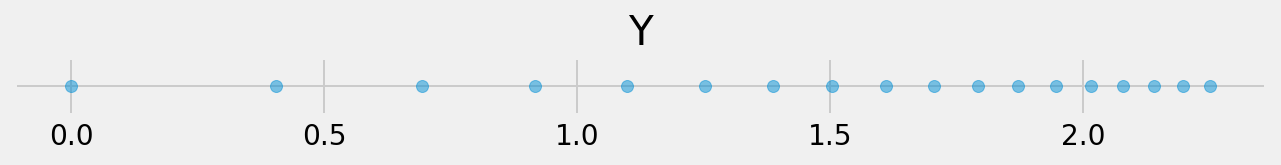

_________________________________________________________________________________




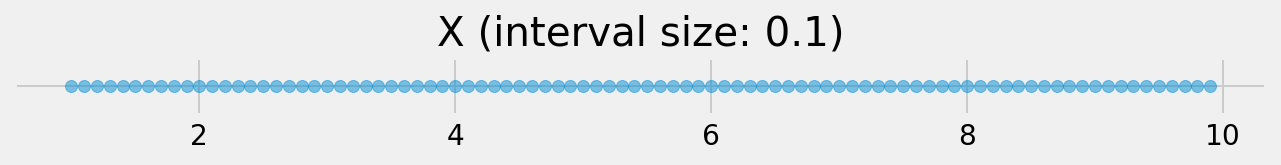

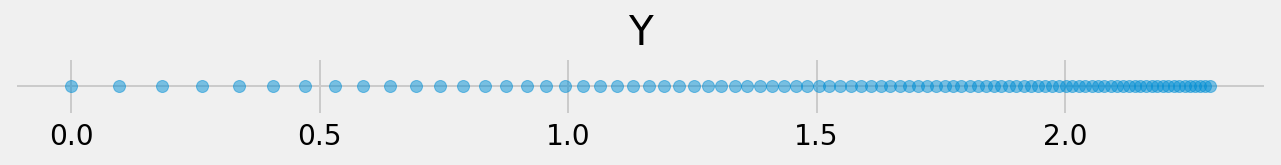

_________________________________________________________________________________




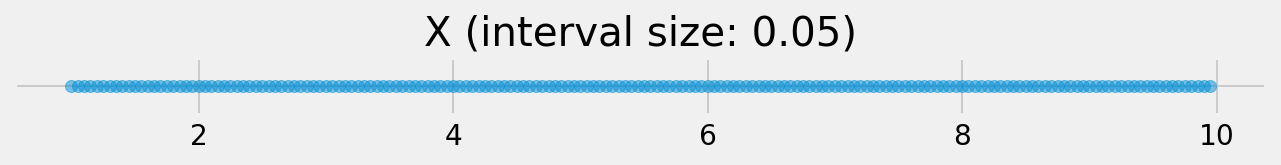

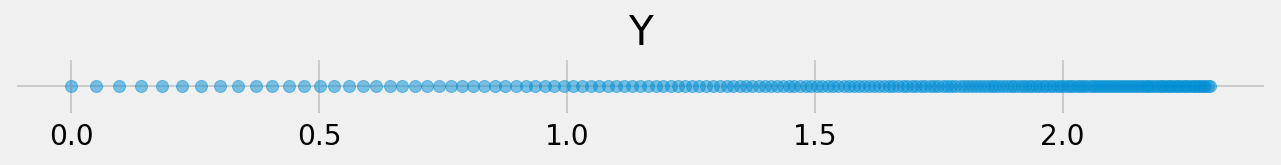

_________________________________________________________________________________




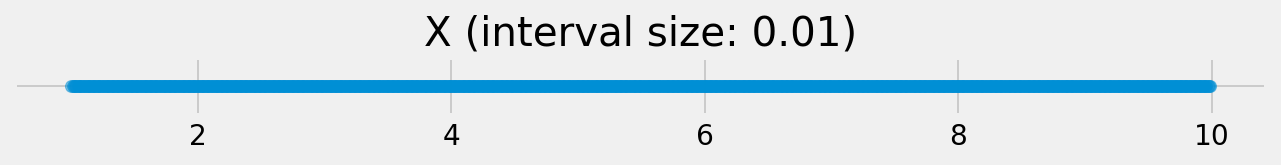

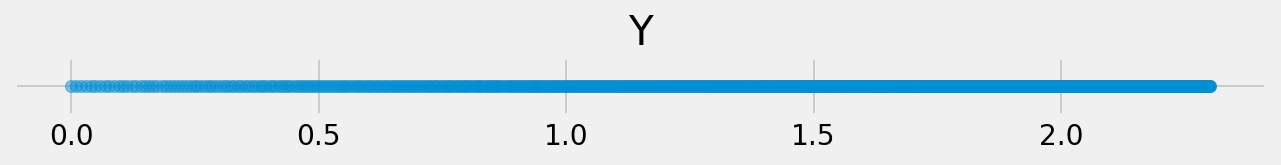

_________________________________________________________________________________




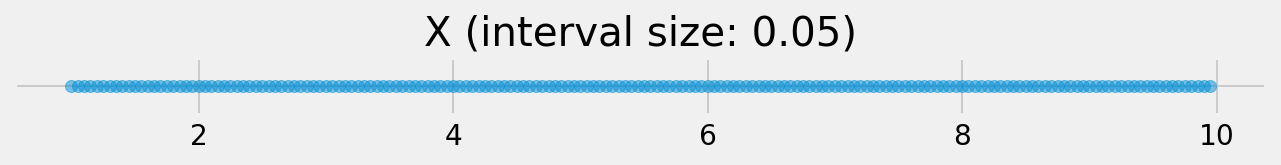

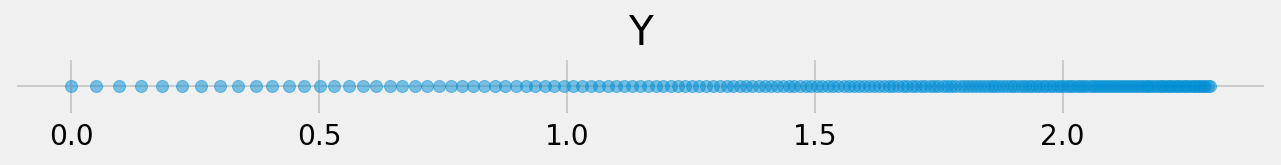

_________________________________________________________________________________




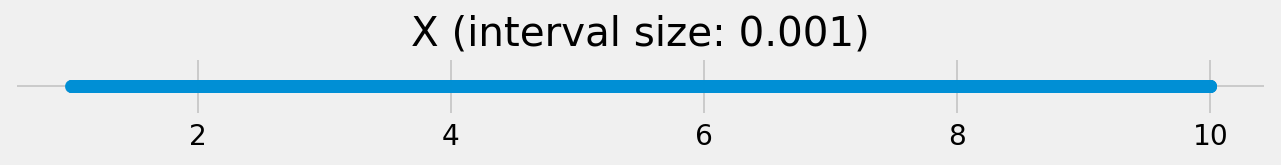

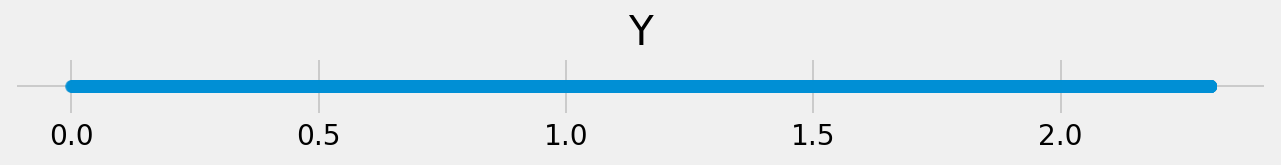

_________________________________________________________________________________




In [64]:
for isize in [1, 0.5, 0.1, 0.05, 0.01, 0.05, 0.001]:
    experiment(interval_size=isize)

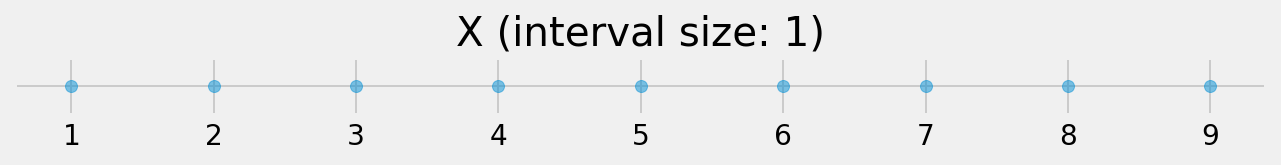

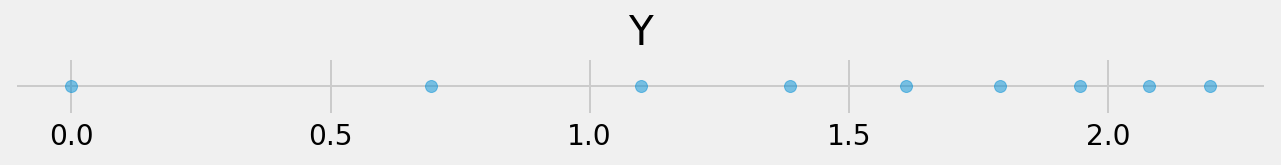

In [42]:
experiment(interval_size=1)

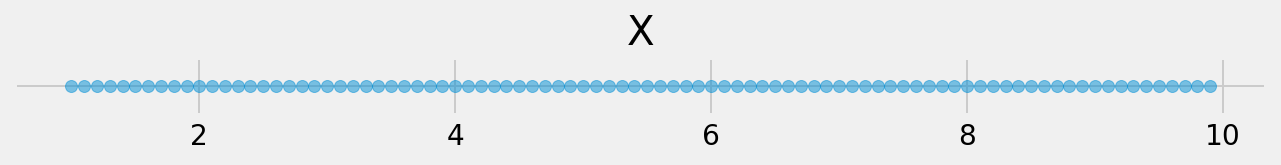

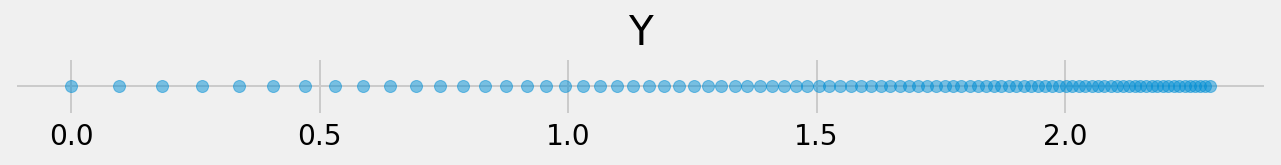

In [35]:
experiment(interval_size=0.1)

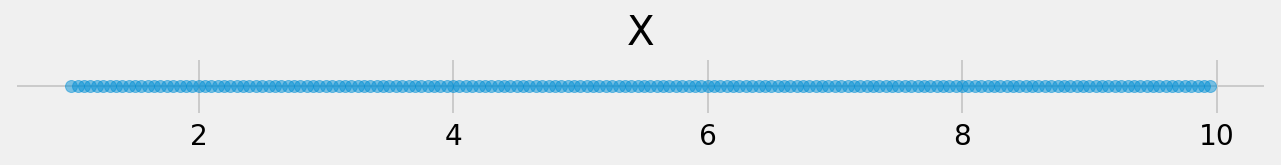

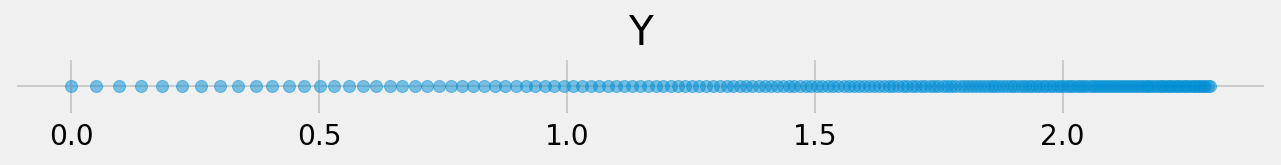

In [37]:
experiment(interval_size=0.05)

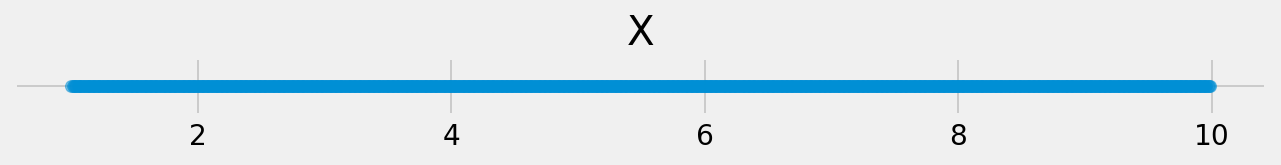

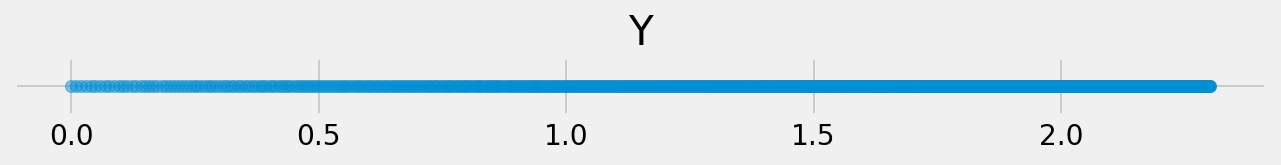

In [38]:
experiment(interval_size=0.01)

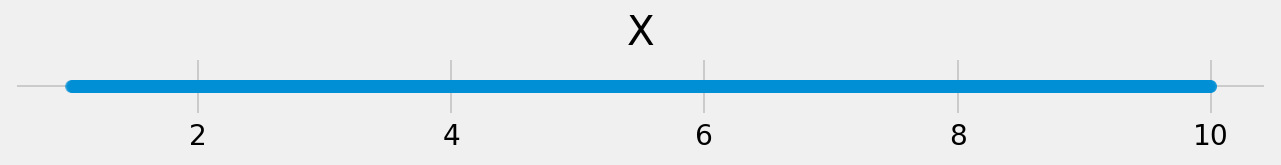

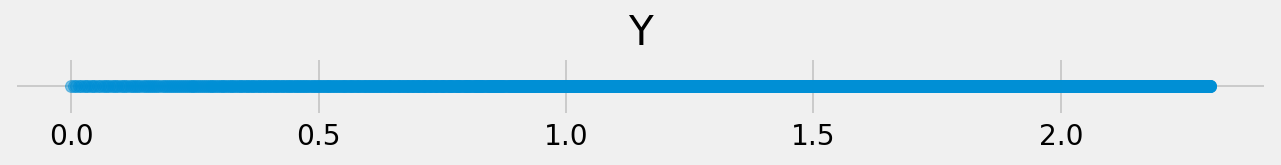

In [39]:
experiment(interval_size=0.005)

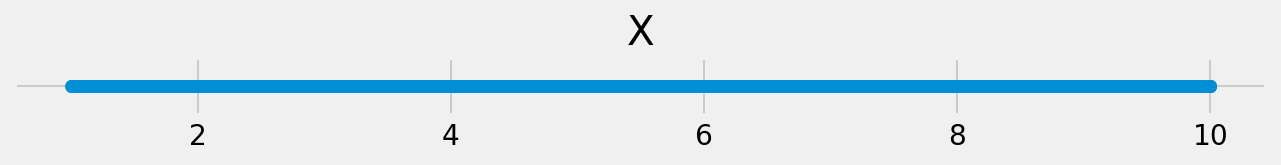

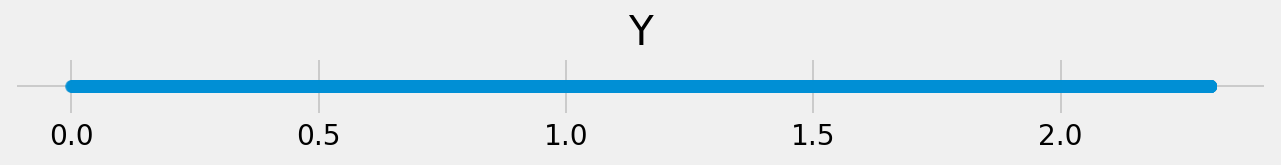

In [40]:
experiment(interval_size=0.001)

### Normal Transform

In [46]:
from scipy import stats

In [47]:
x = np.arange(-5, 5, 0.01)

In [48]:
ndist = stats.norm(loc=1, scale=1.25)

In [49]:
density = ndist.pdf(x)

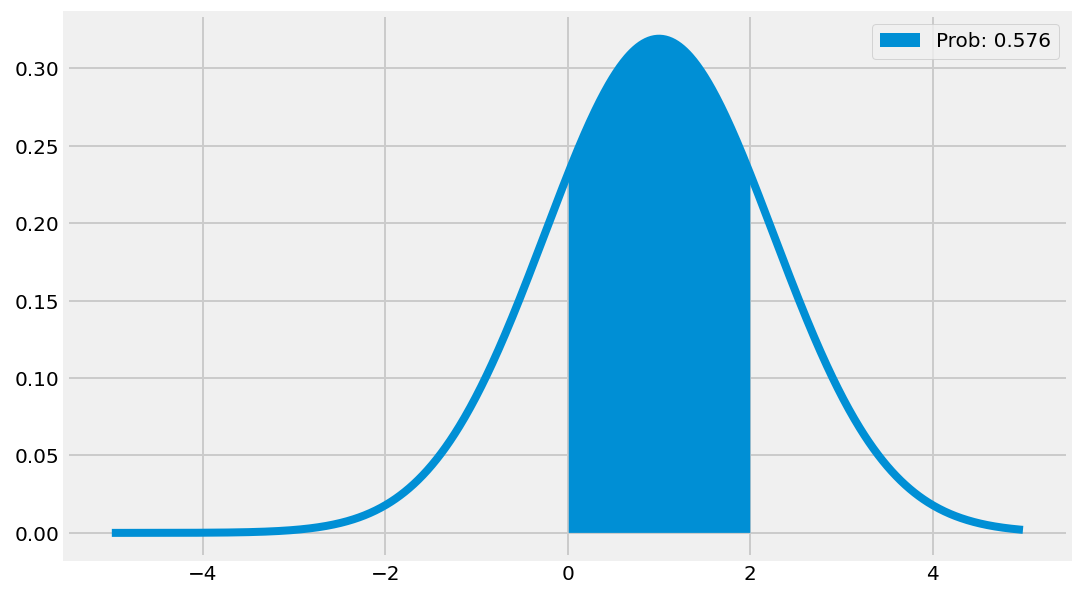

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(x, density)

lower = 0
upper = 2
prob_in_range = round(ndist.cdf(2) - ndist.cdf(0), 3)

plt.fill_between(x, density, where=((x > lower) & (x < upper)), label=f'Prob: {prob_in_range}')
plt.legend()
plt.show()

In [121]:
from scipy.special import expit, logit

In [106]:
def logistic(x): 
    return 1 / (1 + np.e**(-x))

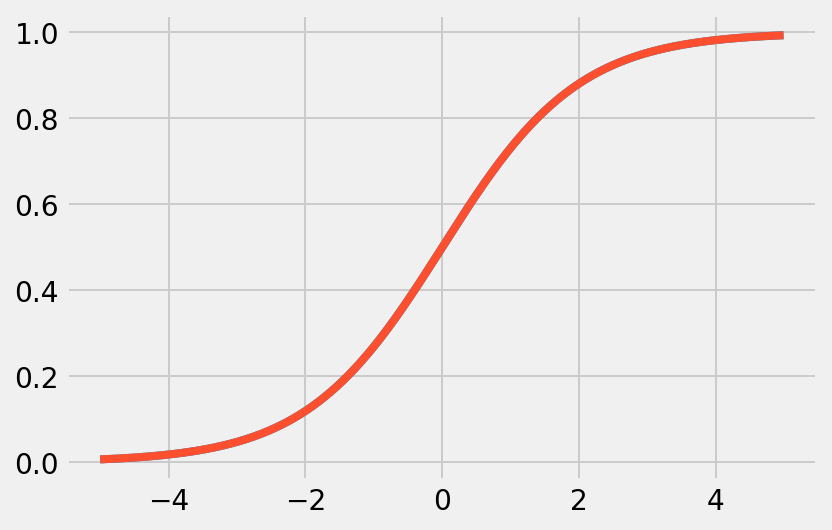

In [125]:
plt.plot(x, expit(x))
plt.plot(x, logistic(x))

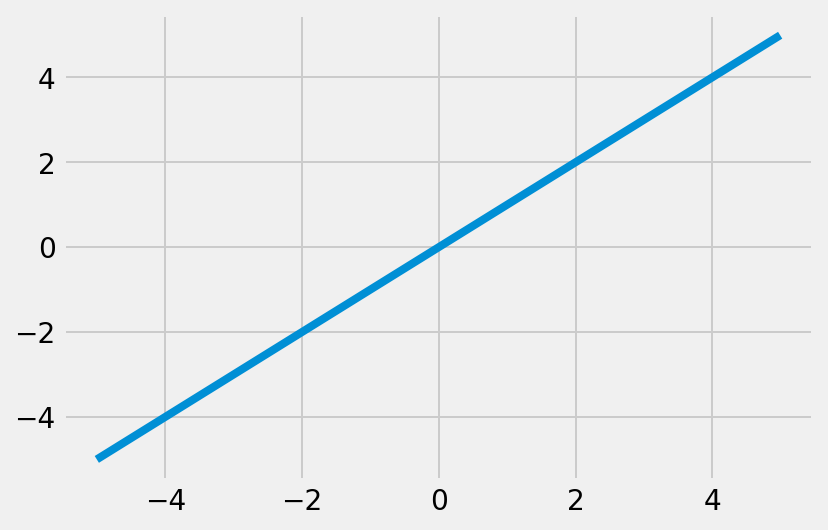

In [127]:
plt.plot(x, logit(expit(x)))

In [131]:
logistic = expit
inv_logistic = logit

def abs_jacobian(y): 
    return (1 / (y * (1 - y)))

In [141]:
# y = logistic(x)

y = np.arange(0.001, 1, 0.001)

density_new = ndist.pdf(
    inv_logistic(y) * abs_jacobian(y)
)

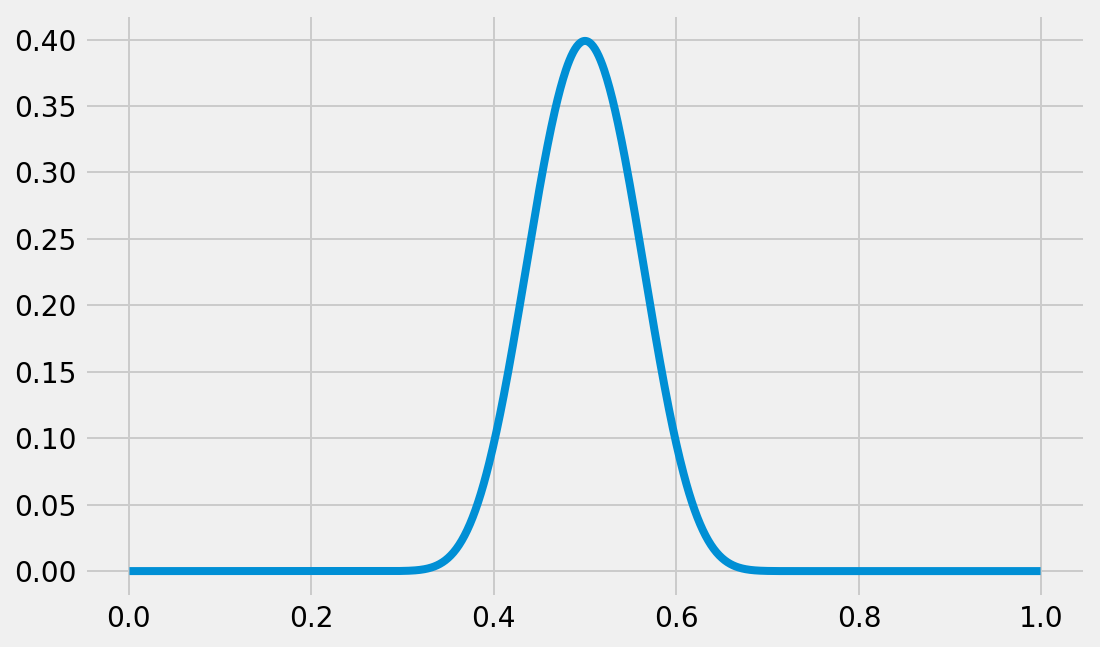

In [143]:
plt.figure(figsize=(8, 5))
plt.plot(y, density_new)

lower = logistic(0)
upper = logistic(2)
# prob_in_range = round(ndist.cdf(2) - ndist.cdf(0), 3)

# plt.fill_between(y, density_new, where=((y > lower) & (y < upper)), label=f'Prob: {prob_in_range}')
# plt.legend()
plt.show()

In [3]:
def g(x):
    return (1 / (1 + np.exp(-x)))


def g_inv(y):
    return (np.log(y / (1 - y)))


def abs_jacobian(y): 
    return (1 / (y * (1 - y)))

In [9]:
ndist = stats.norm(loc=1, scale=1.25)

In [10]:
ys = np.arange(0.001, 1, 0.001)
pdfs = ndist.pdf(g_inv(ys)) * abs_jacobian(ys)

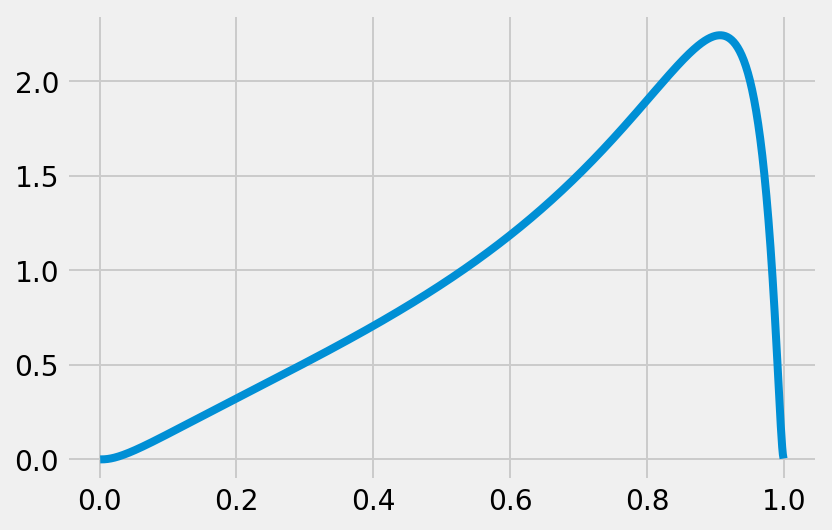

In [11]:
plt.plot(ys, pdfs)

In [18]:
1 + 1

2

# Explainer

Consider the following. We start with the real number line, $\mathbb{R}$. We then log transform it:

Text(0.5, 1.0, 'X')

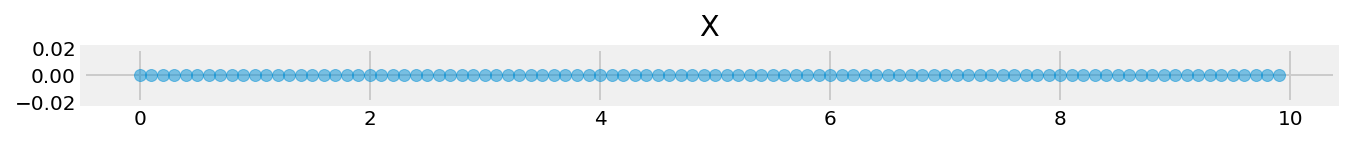

In [7]:
plt.figure(figsize=(10, 0.5))
plt.ylim(-0.02, 0.02)
plt.scatter(x, y, alpha=0.5)
plt.title('X')

Text(0.5, 1.0, 'log(X)')

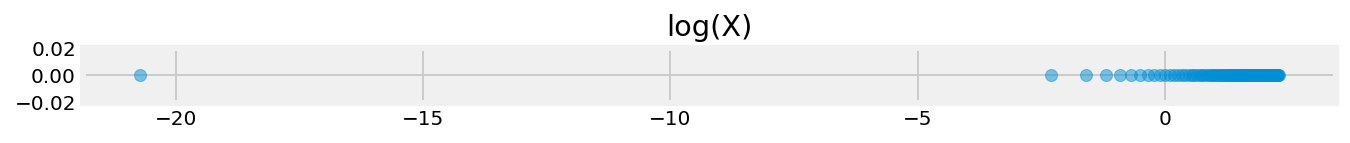

In [8]:
plt.figure(figsize=(10, 0.5))
plt.ylim(-0.02, 0.02)
plt.scatter(np.log(x), y, alpha=0.5)
plt.title('log(X)')

There is a key distinction to keep in mind here! We see that clearly the underlying *space* was indeed transformed. For instance we can see that 5 is mapped to:

In [23]:
x_prime = 5
np.log(x_prime)

1.6094379124341003

And, we can see the range [0, 10] is mapped as follows:

Text(0.5, 1.0, 'log(X)')

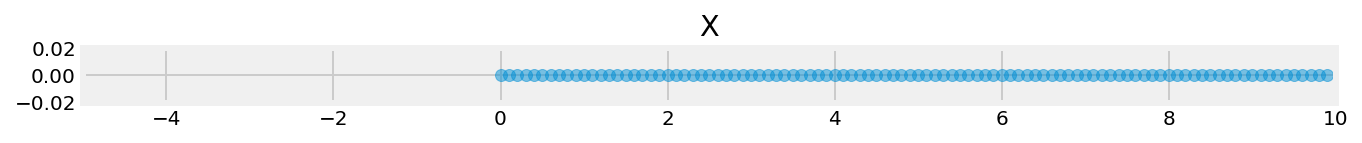

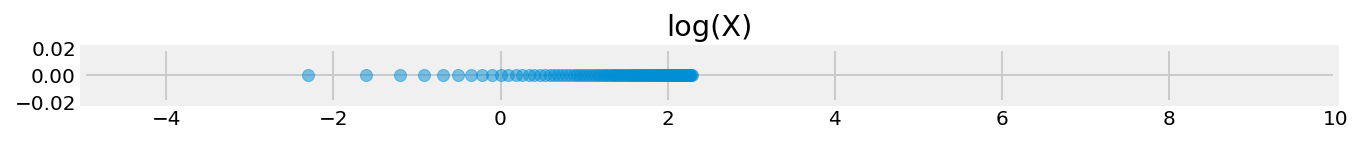

In [22]:
plt.figure(figsize=(10, 0.5))
plt.ylim(-0.02, 0.02)
plt.scatter(x, y, alpha=0.5)
plt.xlim(-5, 10)
plt.title('X')
# plt.axis('off')

plt.figure(figsize=(10, 0.5))
plt.ylim(-0.02, 0.02)
plt.scatter(np.log(x), y, alpha=0.5)
plt.xlim(-5, 10)
plt.title('log(X)')
# plt.axis('off')


It is worth noting something important: 
> After we transform $X$, which was simply $\mathbb{R}$, our resulting transformed space still has **an embedding** in $\mathbb{R}$. 

This is why, above, we can keep the original coordinate system (x ticks) as a reference for where the values of our domain land after the transform. 

Let us now consider a simple curve, $x^2$. 

In [26]:
x = np.arange(1, 10, 0.01)

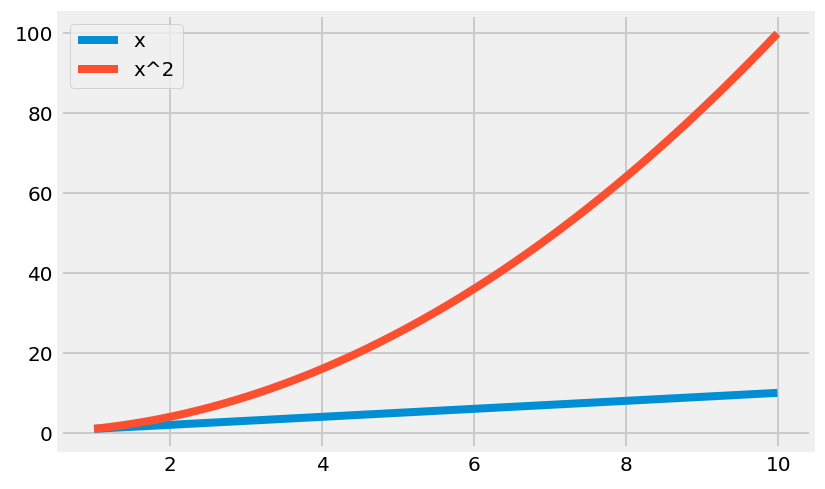

In [31]:
plt.plot(x, x, label='x')
plt.plot(x, x**2, label='x^2')
plt.legend()

We can now see what it looks like after a log transform:

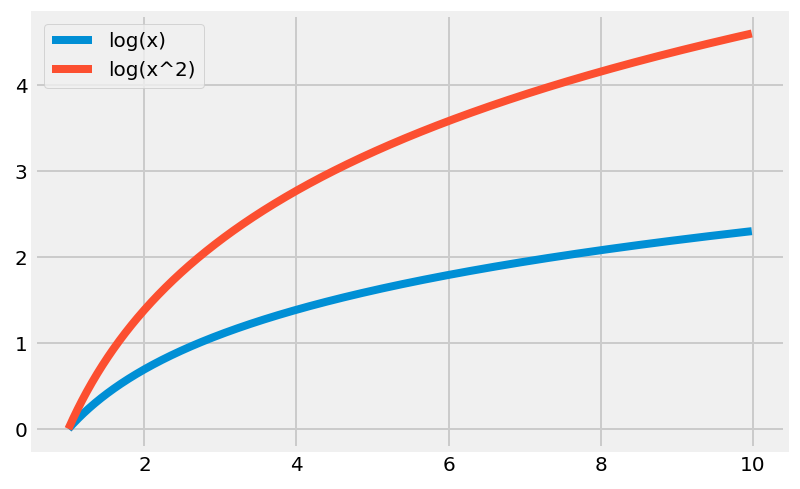

In [34]:
plt.plot(x, np.log(x), label='log(x)')
plt.plot(x, np.log(x**2), label='log(x^2)')
plt.legend()

Key ideas:
* For even the simplest function, it is always going to be a **map** from one set to another set (from a domain to codomain). 
* The interesting thing about functions are the **properties** of the **map**, not the underlying space! For instance, things such as *derivatives* and *curvature* are specifically defined *with respect to* the map! You *need* and input and an output space! 
* So, the question then is what does it mean to transform something to "log space"? I believe that this concept works entirely under the idea that the original space *meant something to you*. For instance, if our original space was covid cases per day and we then log transform it, we now are looking at covid cases on a logarithmic scale:

Text(0.5, 0, 'Day')

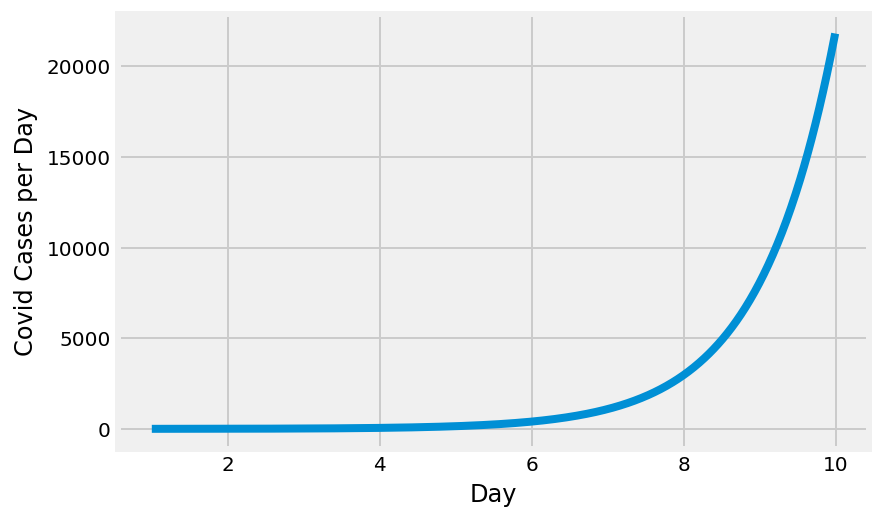

In [41]:
plt.plot(x, np.exp(x))
plt.ylabel('Covid Cases per Day')
plt.xlabel('Day')

Text(0.5, 0, 'Day')

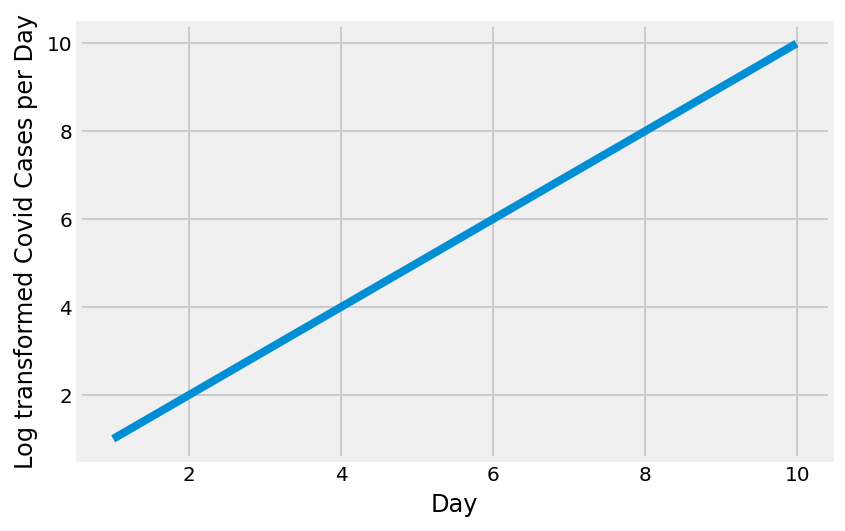

In [44]:
plt.plot(x, np.log(np.exp(x)))
plt.ylabel('Log transformed Covid Cases per Day')
plt.xlabel('Day')

In the second graph, we have log transformed our covid cases per day. Why may we want to do that? Well lets say we wanted the covid cases to have certain properties, such as being linear. Well, we see see they follow an exponential curve, we can log transform them to make them linear. The key is that after the transform we are very interested in what the original space was - it was covid cases! 

# Log Normal

In [59]:
import seaborn as sns
sns.set_context('talk')

In [60]:
ndist = stats.norm(loc=1, scale=1.25)

In [61]:
x = np.arange(-5, 5, 0.01)

In [62]:
ndist = stats.norm(loc=0, scale=1)

In [63]:
density = ndist.pdf(x)

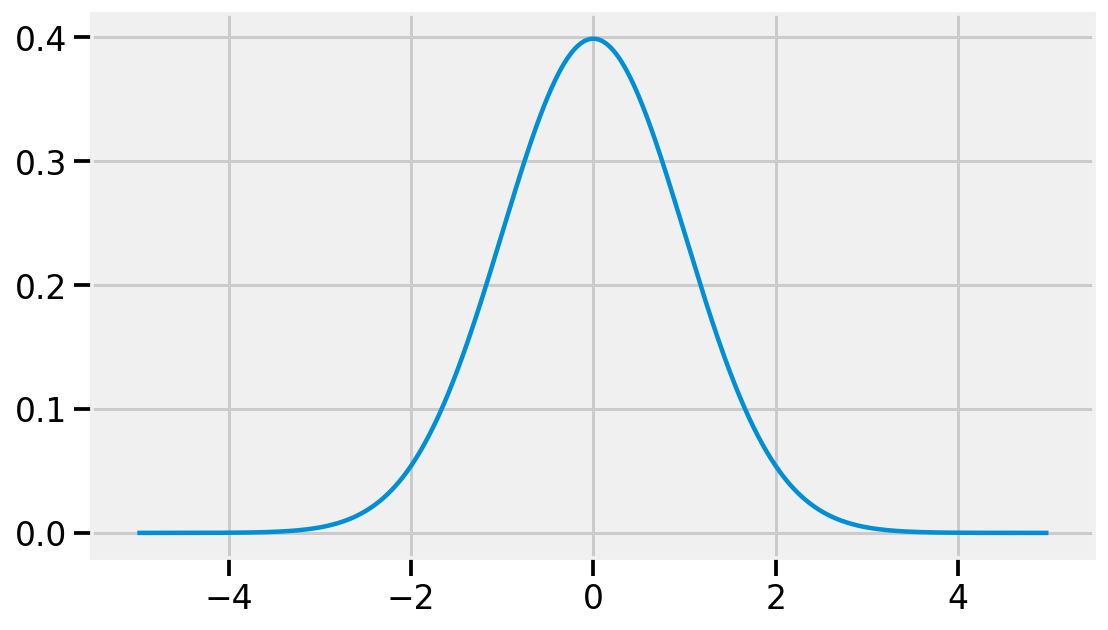

In [64]:
plt.figure(figsize=(8, 5))
plt.plot(x, density)

lower = 0
upper = 2
prob_in_range = round(ndist.cdf(2) - ndist.cdf(0), 3)

# plt.fill_between(x, density, where=((x > lower) & (x < upper)), label=f'Prob: {prob_in_range}')
# plt.legend()
plt.show()

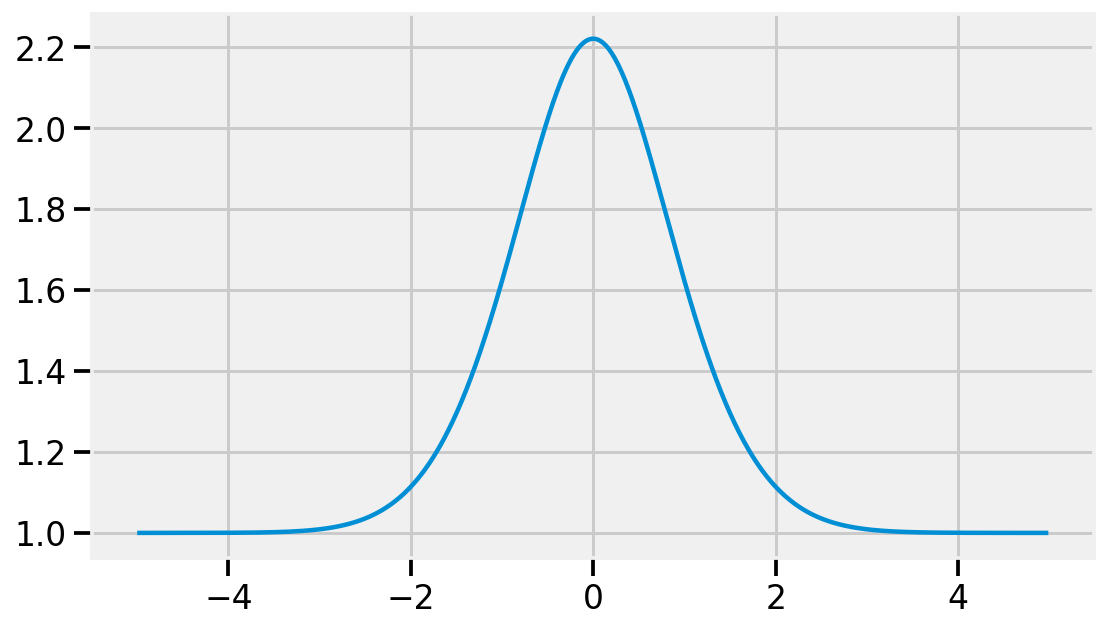

In [70]:
plt.figure(figsize=(8, 5))

mu = 0
sigma = 2

log_norm = np.e**(mu + density*sigma)

plt.plot(x, log_norm)

lower = 0
upper = 2


plt.show()

In [71]:
from scipy.stats import lognorm

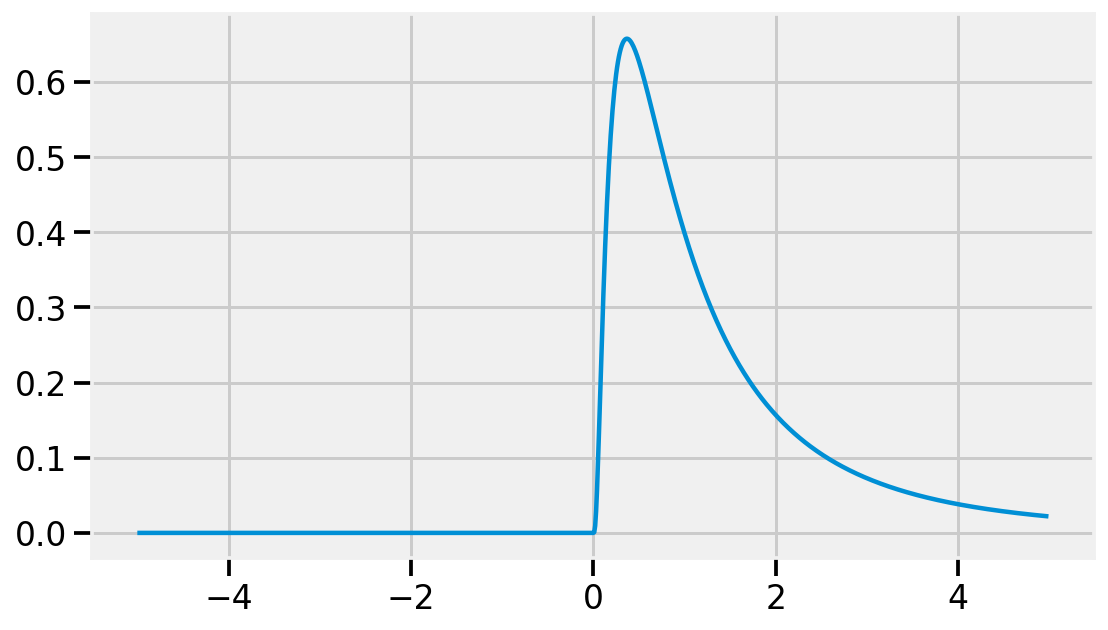

In [85]:
plt.figure(figsize=(8, 5))

mu = 0
sigma = 2



plt.plot(x, lognorm.pdf(x, s=1, loc=0, scale=1))



plt.show()

## PMF - Poisson

In [89]:
import math

In [ ]:
def poisson(x, lam=1):
    total = 0
    for x_ in x:
        total += (np.e ** -lam) * lam ** x_ / math.factorial(x_) 
    return total

In [150]:
x = np.arange(0, 20, 1)

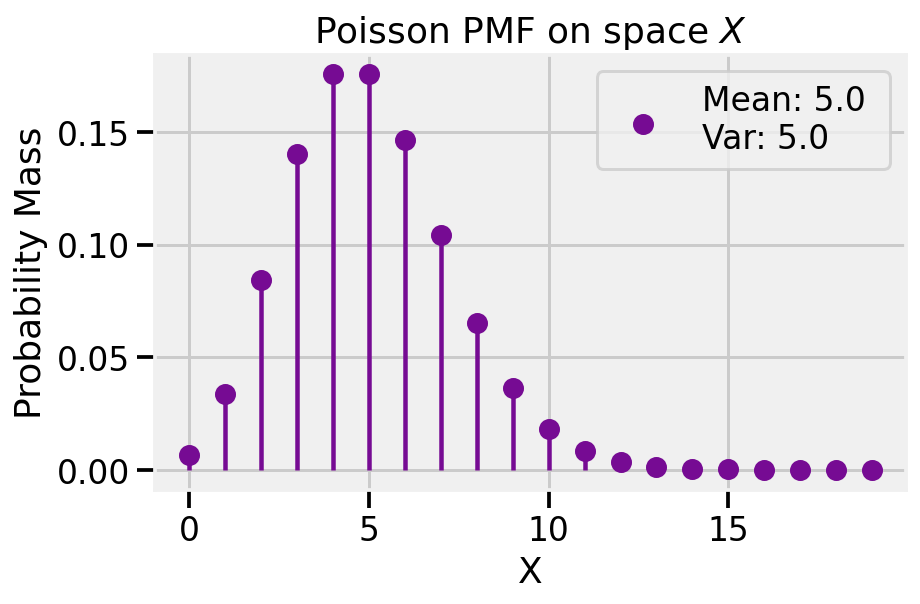

In [217]:
pmf = stats.poisson.pmf(x, 5)
emp_mean = sum(pmf * x)
emp_var = sum(pmf * (x - emp_mean)**2)

plt.scatter(
    x, 
    stats.poisson.pmf(x, 5),
    color='#760b93',
    label=f'Mean: {round(emp_mean, 3)} \nVar: {round(emp_var, 3)}'
)

plt.vlines(
    x, # transform our space X via sqrt
    ymin=0,
    ymax=pmf,
    color='#760b93'

)

plt.title('Poisson PMF on space $X$')
plt.xlabel('X')
plt.ylabel('Probability Mass')
plt.legend()

/var/folders/51/clq1lncx2jj_l22kl523ysvw0000gn/T/ipykernel_77486/2137631483.py:9: RuntimeWarning: divide by zero encountered in log
  np.log(x),


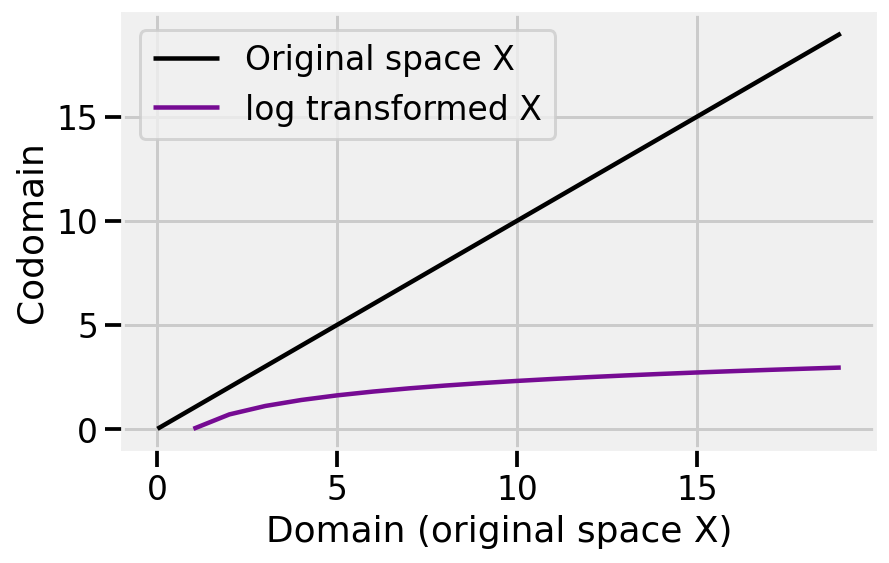

In [218]:
plt.plot(
    x,
    x,
    color='black',
    label='Original space X'
)
plt.plot(
    x,
    np.log(x),
    color='#760b93',
    label='log transformed X'
)
plt.xlabel('Domain (original space X)')
plt.ylabel('Codomain')
plt.legend()

### Square Root Transformed Space

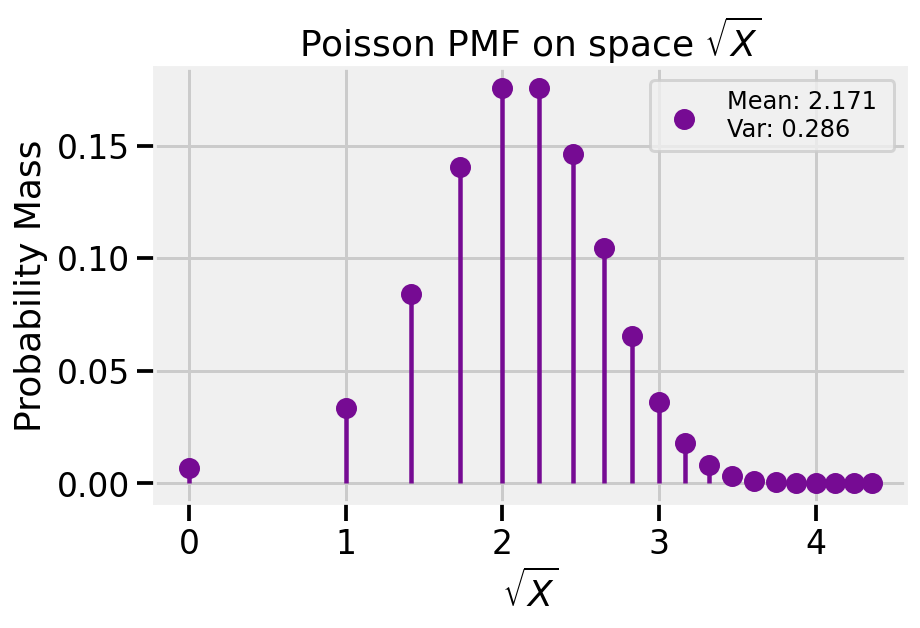

In [216]:
pmf = stats.poisson.pmf(x, 5)
emp_mean = sum(pmf * np.sqrt(x))
emp_var = sum(pmf * (np.sqrt(x) - emp_mean)**2)

plt.scatter(
    np.sqrt(x), # transform our space X via sqrt
    pmf, # The probabilities are pushed forward to values in new space
                            # corresponding to original x's
    color='#760b93',
    label=f'Mean: {round(emp_mean, 3)} \nVar: {round(emp_var, 3)}'
)
plt.vlines(
    np.sqrt(x), # transform our space X via sqrt
    ymin=0,
    ymax=pmf,
    color='#760b93'

)

plt.title('Poisson PMF on space $\sqrt{X}$')
plt.xlabel('$\sqrt{X}$')
plt.ylabel('Probability Mass')
plt.legend(fontsize=12)

In [145]:
for i in [1, 4, 9, 16]:
    print(stats.poisson.pmf(i, 5))

0.03368973499542734
0.17546736976785063
0.036265577415643714
4.91391982253364e-05
